In [3]:
import torch
import os
from PIL import Image
import clip
import os.path as osp
import os, sys
import torchvision.utils as vutils
sys.path.insert(0, '../')

from lib.utils import load_model_weights,mkdir_p
from models.GALIP import NetG, CLIP_TXT_ENCODER

C:\ProgramData\Anaconda3\envs\LLMPractice\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\ProgramData\Anaconda3\envs\LLMPractice\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [5]:
device = 'cpu' # 'cpu' # 'cuda:0'
CLIP_text = "ViT-B/32"
clip_model, preprocess = clip.load("ViT-B/32", device=device)
clip_model = clip_model.eval()

In [14]:
text_encoder = CLIP_TXT_ENCODER(clip_model).to(device)
netG = NetG(64, 100, 512, 256, 3, False, clip_model).to(device)
path = '../saved_models/pretrained/pre_cc12m.pth'
checkpoint = torch.load(path, map_location=torch.device('cpu'))
netG = load_model_weights(netG, checkpoint['model']['netG'], multi_gpus=False)


In [9]:
batch_size = 8
noise = torch.randn((batch_size, 100)).to(device)

In [18]:
captions = ['Eggplant casserole']


In [19]:
mkdir_p('./samples')


In [20]:
with torch.no_grad():
    for i in range(len(captions)):
        caption = captions[i]
        print(captions)
        tokenized_text = clip.tokenize([caption]).to(device)
        sent_emb, word_emb = text_encoder(tokenized_text)
        sent_emb = sent_emb.repeat(batch_size,1)
        fake_imgs = netG(noise,sent_emb,eval=True).float()
        name = f'{captions[i].replace(" ", "-")}'
        vutils.save_image(fake_imgs.data, 'samples/%s.png'%(name), nrow=8, value_range=(-1, 1), normalize=True)

['Eggplant casserole']


In [21]:
path = '../saved_models/pre_cc12m.pth'
checkpoint = torch.load(path, map_location=torch.device('cpu'))
netG = load_model_weights(netG, checkpoint['model']['netG'], multi_gpus=False)


In [22]:
batch_size = 8
noise = torch.randn((batch_size, 100)).to(device)

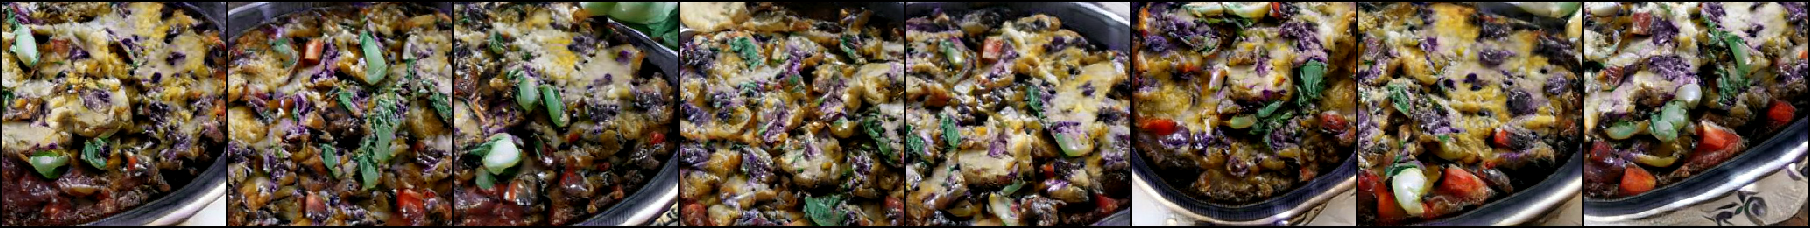

In [23]:
captions = ['Eggplant casserole']

with torch.no_grad():
    for i in range(len(captions)):
        caption = captions[i]
        tokenized_text = clip.tokenize([caption]).to(device)
        sent_emb, word_emb = text_encoder(tokenized_text)
        sent_emb = sent_emb.repeat(batch_size,1)
        fake_imgs = netG(noise,sent_emb,eval=True).float()
        name = f'{captions[i].replace(" ", "-")}'
        #vutils.save_image(fake_imgs.data, 'samples/%s.png'%(name), nrow=8, value_range=(-1, 1), normalize=True)
         
        img=vutils.save_image(fake_imgs.data, 'samples/picture.png', nrow=8, value_range=(-1, 1), normalize=True)
        from IPython.display import Image,display
        display(Image('samples/picture.png'))
